# Check if variance changes throughout the weeks

In [2]:
import sys
import os
import pandas as pd


# Make sure the root or 03_optimization folder is in the path
sys.path.append(os.path.abspath('../'))   # adjust path if needed
sys.path.append(os.path.abspath('../..'))   # adjust path if needed
#print (sys.path)
print("Current Python Path:", sys.path)
from utils import map_building_to_pv_num_orientation

Current Python Path: ['/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/srv/fh6281/GermanBuildingDate/venv/lib/python3.10/site-packages', '/srv/fh6281/GermanBuildingDate/03_optimization', '/srv/fh6281/GermanBuildingDate', '/srv/fh6281/GermanBuildingDate/03_optimization', '/srv/fh6281/GermanBuildingDate']


In [3]:
buildings = ["SFH3", "SFH4", "SFH9", "SFH10", "SFH12", "SFH14", "SFH16", "SFH18", "SFH19", "SFH22", "SFH27", "SFH28", "SFH29", "SFH30", "SFH32", "SFH36"]

b = buildings[0]

num, orient = map_building_to_pv_num_orientation(b)

path = f'/srv/fh6281/GermanBuildingDate/01_data/prosumption_data/15min/prosumption_{b}_num_pv_modules_{num}_pv_{orient}_hp_1.0.csv'
df = pd.read_csv(path, index_col=0, parse_dates=True)
df = df / 1000

In [4]:
week1 = df.loc["2020-06-08":"2020-06-15", "P_TOT"]
week2 = df.loc["2020-11-09":"2020-11-16", "P_TOT"]

# scale data to kWh

std_week_1 = week1.std()
std_week_2 = week2.std()
var_week_1 = week1.var()
var_week_2 = week2.var()

print("\nBuilding:", b)
print("Week 1 - Std:", std_week_1, "  Var:", var_week_1)
print("Week 2 - Std:", std_week_2, "  Var:", var_week_2)


Building: SFH3
Week 1 - Std: 1.4662656563867122   Var: 2.149934975099156
Week 2 - Std: 1.1326901285048578   Var: 1.2829869272123513


In [6]:
for b in buildings:
    num, orient = map_building_to_pv_num_orientation(b)
    path = f'/srv/fh6281/GermanBuildingDate/01_data/prosumption_data/15min/prosumption_{b}_num_pv_modules_{num}_pv_{orient}_hp_1.0.csv'
    df_b = pd.read_csv(path, index_col=0, parse_dates=True)
    df_b = df_b / 1000

    week1_b = df_b.loc["2020-06-08":"2020-06-15", "P_TOT"]
    week2_b = df_b.loc["2020-11-09":"2020-11-16", "P_TOT"]

    std_week_1_b = week1_b.std()
    std_week_2_b = week2_b.std()
    var_week_1_b = week1_b.var()
    var_week_2_b = week2_b.var()
    mean_week_1_b = week1_b.mean()
    mean_week_2_b = week2_b.mean()

    print("\nBuilding:", b)
    print("Week 1 - Std:", std_week_1_b, "  Var:", var_week_1_b, "  Mean:", mean_week_1_b)
    print("Week 2 - Std:", std_week_2_b, "  Var:", var_week_2_b, "  Mean:", mean_week_2_b)



Building: SFH3
Week 1 - Std: 1.4662656563867122   Var: 2.149934975099156   Mean: -0.8350510058704206
Week 2 - Std: 1.1326901285048578   Var: 1.2829869272123513   Mean: 0.16365344739084153

Building: SFH4
Week 1 - Std: 1.6550783758429086   Var: 2.7392844301828005   Mean: -0.9435752426815025
Week 2 - Std: 1.2921816557193693   Var: 1.6697334313776508   Mean: 0.3882813153366282

Building: SFH9
Week 1 - Std: 2.144196790079369   Var: 4.597579874586669   Mean: -0.6787219595585214
Week 2 - Std: 1.4666723473967627   Var: 2.15112777461833   Mean: 0.937600318149539

Building: SFH10
Week 1 - Std: 1.4042560214986592   Var: 1.9719349739152428   Mean: -0.27386114083210655
Week 2 - Std: 1.1394910824485305   Var: 1.2984399269797238   Mean: 0.8170469312943757

Building: SFH12
Week 1 - Std: 1.2150579107668416   Var: 1.4763657265170818   Mean: -0.49082219609866873
Week 2 - Std: 1.1555138246679382   Var: 1.3352121989987267   Mean: 0.4582899506324068

Building: SFH14
Week 1 - Std: 1.5707285746608626   Var:

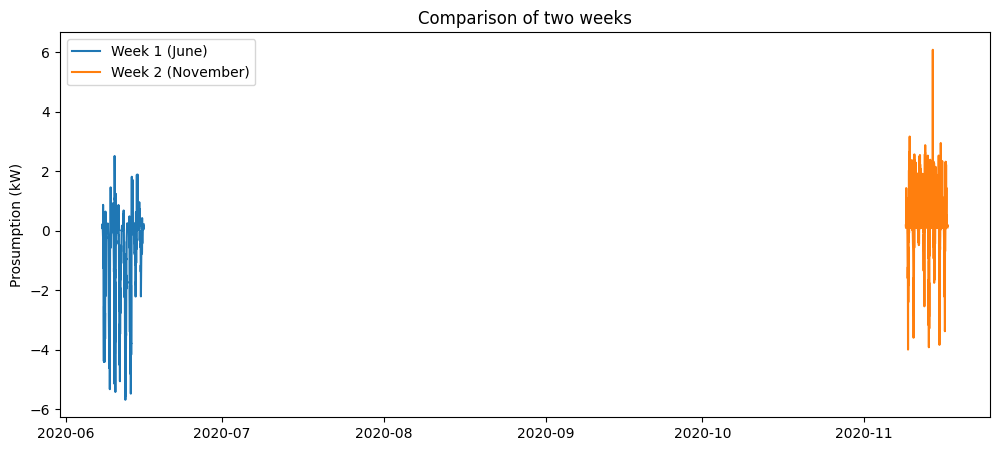

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(week1.index, week1.values, label="Week 1 (June)")
plt.plot(week2.index, week2.values, label="Week 2 (November)")
plt.legend()
plt.ylabel("Prosumption (kW)")
plt.title("Comparison of two weeks")
plt.show()